<h1>Does Population Affect COVID-19 Spread?</h1>


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [36]:

df = pd.read_csv("us-counties416.csv")

#select all rows with Alabama and specifc date
alabama = df.loc[(df['state']=="Alabama")&(df['date']=='2020-04-15')]

#select only these columns and add them to a dataframe
alabama_necessary_columns_only = alabama[['county','cases','deaths']]

#add 'County' to the county column to match with other dataframe
alabama_necessary_columns_only.loc[:,'county'] = alabama_necessary_columns_only['county'] + " County"

#change index to county for merging
alabama_necessary_columns_only = alabama_necessary_columns_only.set_index("county")


In [37]:
df1 = pd.read_excel('AlabamaCounties.xlsx')

#select relevant columns from dataframe
counties_population = df1[['County','Population']]

#change column header to match column from other dataframe
counties_population = counties_population.rename(columns = {'County':'county'})

#change index to county for merging
counties_population = counties_population.set_index("county")



In [38]:

#merge both dataframes
data = alabama_necessary_columns_only.merge(counties_population, on='county')
data


,cases,deaths,Population
county,,,
Autauga County,25,1,55200
Baldwin County,98,2,208107
Barbour County,13,0,25782
Bibb County,19,0,22527
Blount County,17,0,57645
Bullock County,8,0,10352
Butler County,11,0,20025
Calhoun County,62,0,115098
Chambers County,227,10,33826


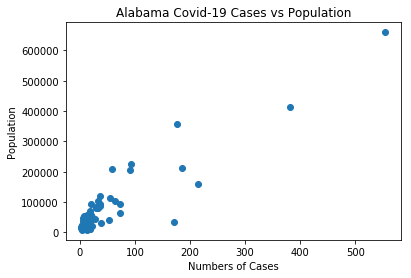

In [275]:

plt.scatter(data['cases'], data['Population'])
plt.xlabel("Numbers of Cases")
plt.ylabel("Population")
plt.title("Alabama Covid-19 Cases vs Population")
plt.show()

849.4204440871032 18840.117860098395


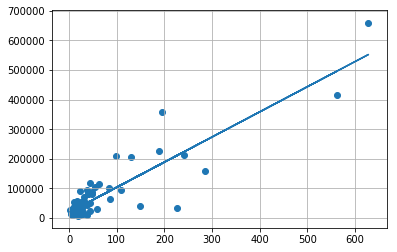

In [39]:
x = data['cases']
y = data['Population']


(m, b) = np.polyfit(x, y, 1)
print(m, b)

yp = np.polyval([m, b], x)
plt.plot(x, yp)
plt.grid(True)
plt.scatter(x,y)
                                        
                                        